In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Charger ton dataset
df = pd.read_csv("geo_safety_data.csv")

# Supprimer les colonnes inutiles
df.drop(columns=['jour', 'mois', 'LOCATION'], inplace=True)

# Filtrer les lignes avec une heure valide
df = df[(df['heure'] >= 0) & (df['heure'] <= 23)]

X = df[['Vict Age', 'Vict Sex', 'heure', 'LAT', 'LON']]
y = df['danger']

# Encoder la variable 'Vict Sex' en numérique
X['Vict Sex'] = X['Vict Sex'].map({'M': 1, 'F': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\info tech\AppData\Local\Temp\ipykernel_16784\3084613574.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vict Sex'] = X['Vict Sex'].map({'M': 1, 'F': 0})


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialiser le modèle SVM
model_svm = SVC(kernel='linear')  # 'linear' pour une séparation linéaire, tu peux aussi essayer 'rbf' pour une séparation non linéaire

# Entraîner le modèle
model_svm.fit(X_train, y_train)

# Faire des prédictions
y_pred_svm = model_svm.predict(X_test)

# Évaluer le modèle
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))


Accuracy (SVM): 0.6441441441441441


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialiser le modèle KNN
model_knn = KNeighborsClassifier(n_neighbors=5)  # Choisir un nombre de voisins (k)

# Entraîner le modèle
model_knn.fit(X_train, y_train)

# Faire des prédictions
y_pred_knn = model_knn.predict(X_test)

# Évaluer le modèle
print("Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))


Accuracy (KNN): 0.8378378378378378


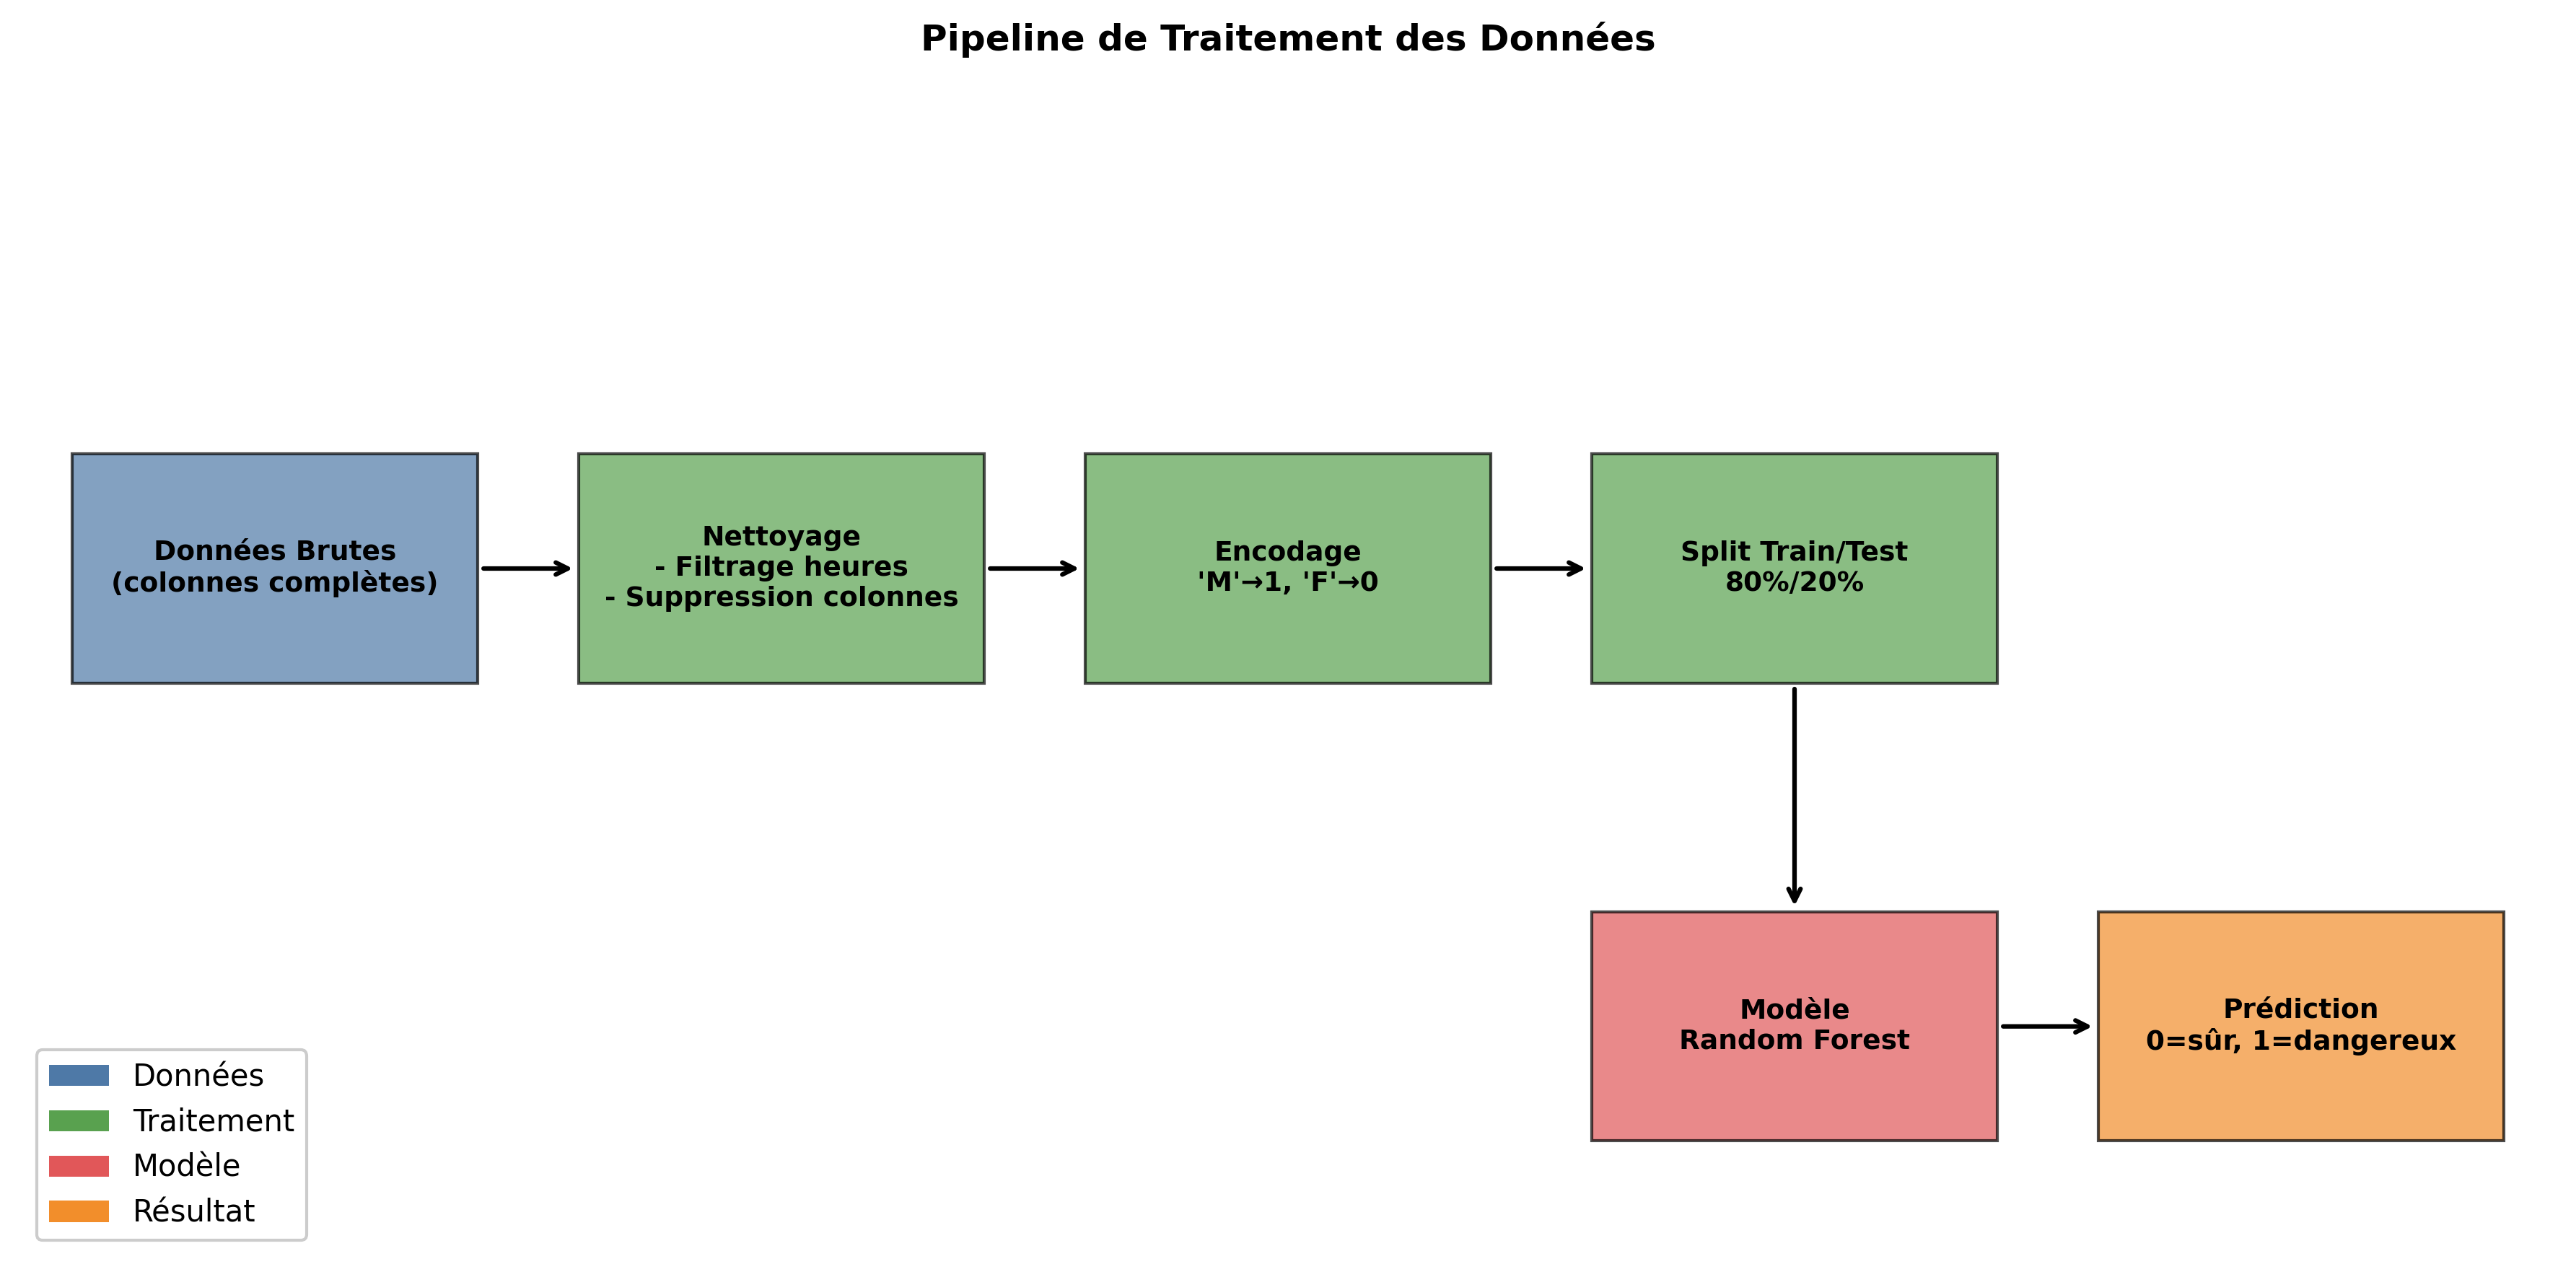

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow

plt.figure(figsize=(12, 6), dpi=300)
ax = plt.gca()
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.axis('off')

# Couleurs professionnelles
colors = {
    'data': '#4E79A7',
    'process': '#59A14F', 
    'model': '#E15759',
    'prediction': '#F28E2B'
}

# Éléments du schéma
steps = [
    {"text": "Données Brutes\n(colonnes complètes)", "pos": (1, 3), "type": "data"},
    {"text": "Nettoyage\n- Filtrage heures\n- Suppression colonnes", "pos": (3, 3), "type": "process"},
    {"text": "Encodage\n'M'→1, 'F'→0", "pos": (5, 3), "type": "process"},
    {"text": "Split Train/Test\n80%/20%", "pos": (7, 3), "type": "process"},
    {"text": "Modèle\nRandom Forest", "pos": (7, 1), "type": "model"},
    {"text": "Prédiction\n0=sûr, 1=dangereux", "pos": (9, 1), "type": "prediction"}
]

# Dessin des blocs
for step in steps:
    ax.add_patch(Rectangle(
        (step['pos'][0]-0.8, step['pos'][1]-0.5), 1.6, 1,
        fill=True, color=colors[step['type']], alpha=0.7, ec='black'))
    plt.text(
        step['pos'][0], step['pos'][1], step['text'],
        ha='center', va='center', fontsize=9, weight='bold')

# Flèches
arrows = [
    ((1.8, 3), (2.2, 3)),
    ((3.8, 3), (4.2, 3)),
    ((5.8, 3), (6.2, 3)), 
    ((7, 2.5), (7, 1.5)),
    ((7.8, 1), (8.2, 1))
]

for start, end in arrows:
    ax.annotate("", xy=end, xytext=start,
                arrowprops=dict(arrowstyle="->", lw=1.5))

# Légende
legend_elements = [
    plt.Rectangle((0,0),1,1,fc=colors['data'], label="Données"),
    plt.Rectangle((0,0),1,1,fc=colors['process'], label="Traitement"),
    plt.Rectangle((0,0),1,1,fc=colors['model'], label="Modèle"),
    plt.Rectangle((0,0),1,1,fc=colors['prediction'], label="Résultat")
]
plt.legend(handles=legend_elements, loc='lower left', framealpha=1)

plt.title("Pipeline de Traitement des Données", pad=20, weight='bold')
plt.tight_layout()
plt.savefig('data_pipeline.png', bbox_inches='tight')
plt.show()